In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset

url = "https://raw.githubusercontent.com/Oyeniran20/Machine-Learning/refs/heads/main/3.%20Classification%20-/Exercise.csv"
df = pd.read_csv(url)
#Displaying information

print(df.info())
print(df.describe())
# Check for missing values
#print(df.isnull.sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB
None
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [11]:
# Data cleaning

df = df.drop_duplicates()
df = df.dropna()
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,14733363,68,190,94,29,105,40.8,231,True
1,14861698,20,166,60,14,94,40.3,66,False
2,11179863,69,179,79,5,88,38.7,26,True
3,16180408,34,179,71,13,100,40.5,71,False
4,17771927,27,154,58,10,81,39.8,35,False


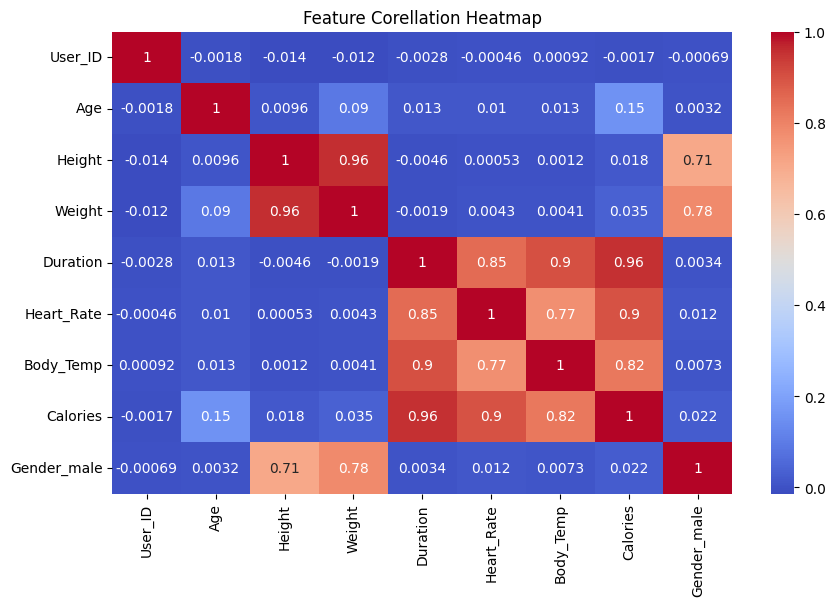

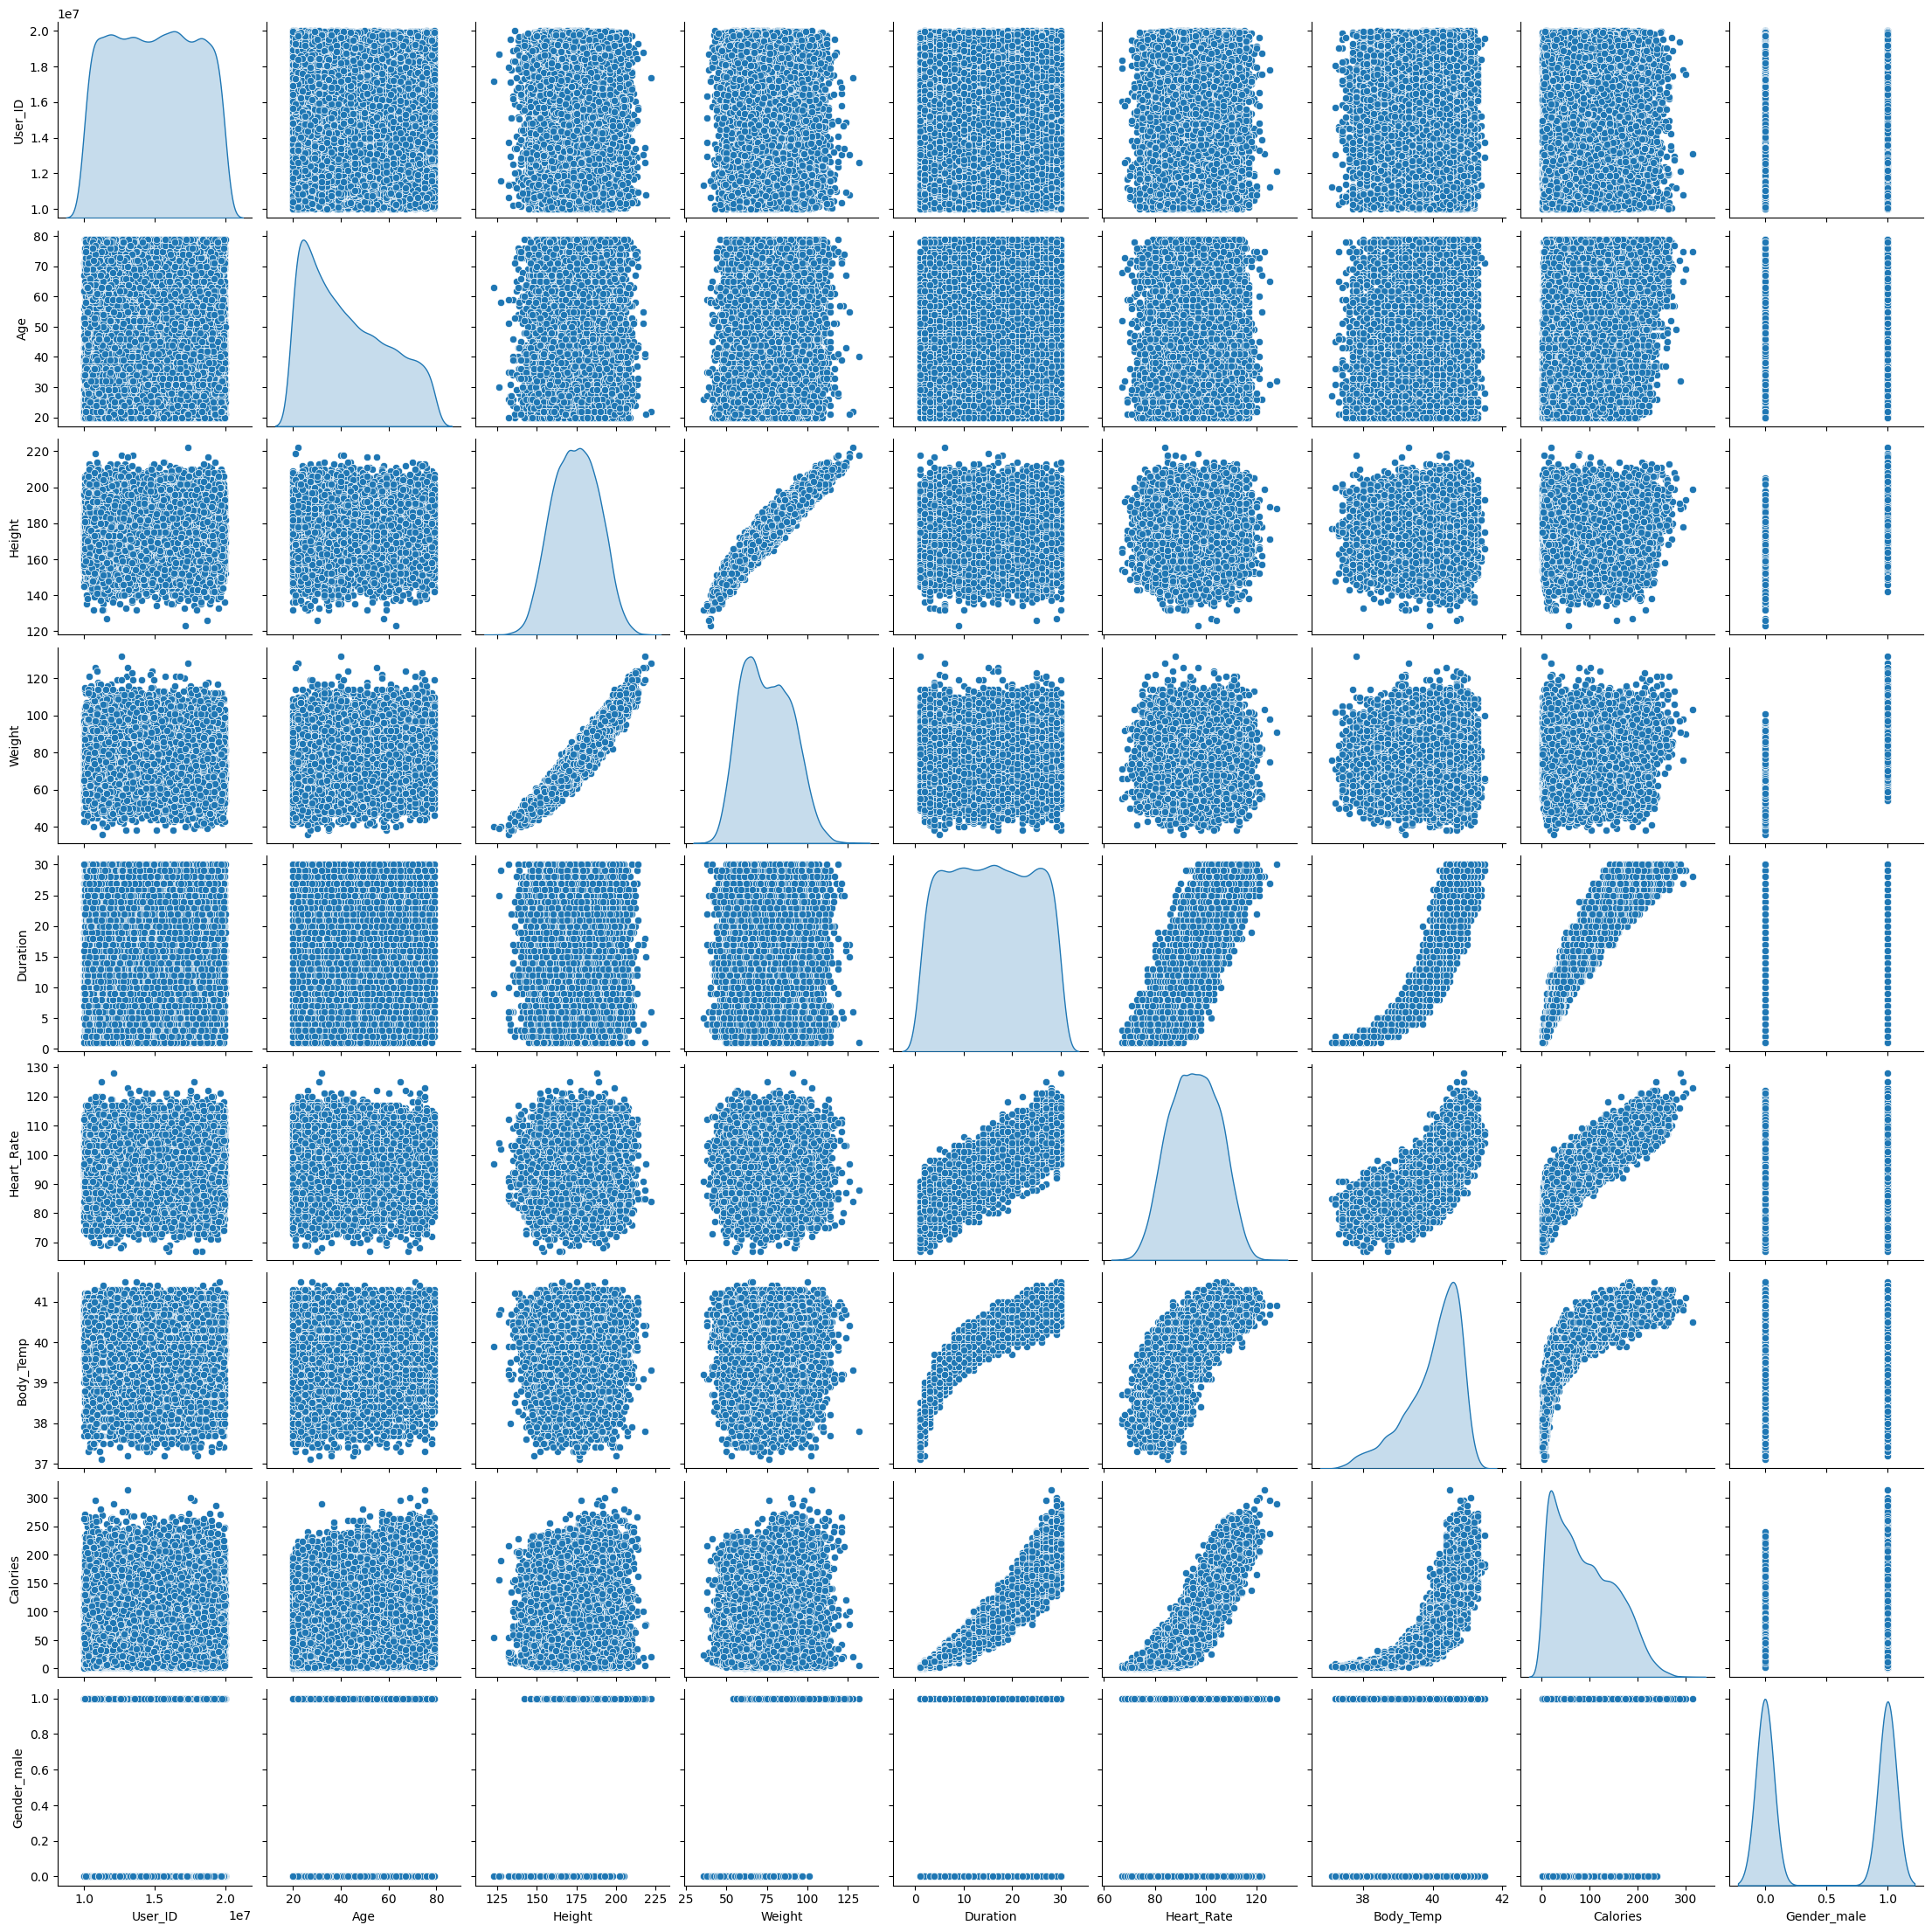

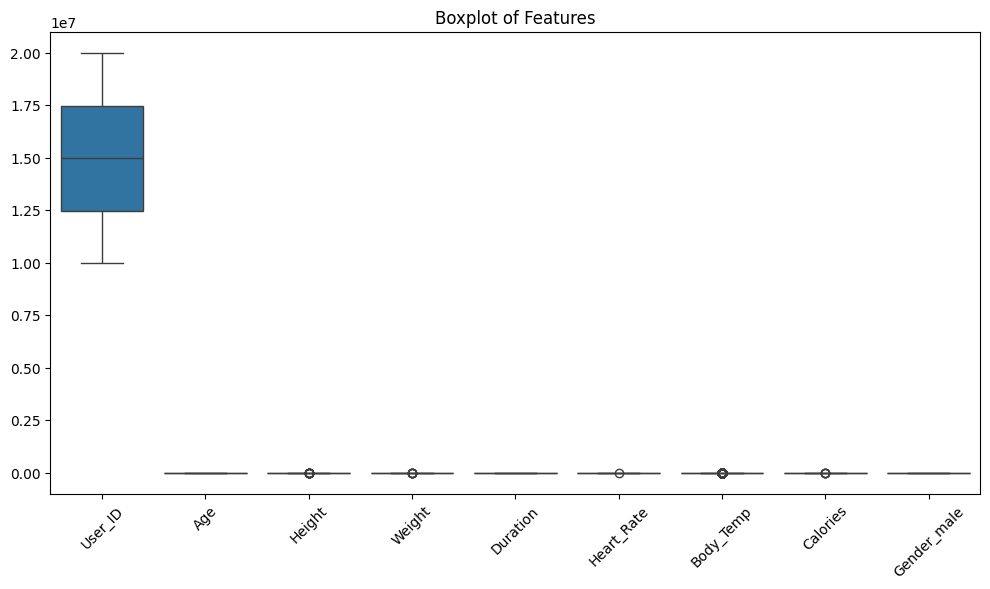

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Corellation Heatmap")
plt.show()

sns.pairplot(df, diag_kind='kde')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

In [19]:
X = df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Gender_male']]
y = df['Calories']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(chad)
r2 = r2_score(y_test, y_pred)

# RESULTS
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R Score: {r2:.2f}")

Mean Absolute Error: 8.44
Mean Squared Error: 132.00
Root Mean Squared Error: 11.49
R Score: 0.97


In [23]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

       Feature  Coefficient
3     Duration    55.137843
4   Heart_Rate    19.078442
0          Age     8.515540
2       Weight     4.304673
6  Gender_male    -0.687084
1       Height    -2.418931
5    Body_Temp   -13.201654
